In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
import os
file_path = './data/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
print(lines.shape)

전체 샘플의 수 : 217975
(217975, 3)


__상위 33000개 샘플만 사용, 세 번째 컬럼 삭제(불필요)__

In [3]:
lines = lines[['eng', 'fra']][:33000]
print(lines.shape)
lines.sample(5)

(33000, 2)


,eng,fra
2589,Tom's fast.,Tom est rapide.
5611,Is it a trap?,Est-ce que c'est un piège ?
3069,He stood up.,Il s'est levé.
9105,They're quiet.,Elles sont silencieuses.
1356,Let me go.,Laissez-moi m'en aller !


In [4]:
lines.head(5)

,eng,fra
0,Go.,Va !
1,Go.,Marche.
2,Go.,En route !
3,Go.,Bouge !
4,Hi.,Salut !


## Step 1. 정제, 정규화, 전처리 (영어, 프랑스어 모두)

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [6]:
def texts_to_sequences(lines_data):
    sentences = []
    for i in range(len(lines_data)):
        line = lines_data[i]
        sent = text_to_word_sequence(line, lower=True, split=" ")
        sent_list = list(map(str, sent))
        sentences.append(sent_list)
        
    return sentences

__모두 소문자로 변경__
https://sparkbyexamples.com/pandas/convert-pandas-column-to-lowercase/

In [7]:
lines['eng'] = lines['eng'].apply(str.lower)
lines['fra'] = lines['fra'].apply(str.lower)

In [52]:
lines.head(5)

,eng,fra
0,go.,va !
1,go.,marche.
2,go.,en route !
3,go.,bouge !
4,hi.,salut !


__구두점 분리 및 공백기준 split__ https://www.nltk.org/api/nltk.tokenize.html

In [9]:
from nltk.tokenize import wordpunct_tokenize
def wordpunct(lines_data):
    sentences = []
    for i in range(len(lines_data)):
        line = lines_data[i]
        sent = wordpunct_tokenize(line)
        sent_list = list(map(str, sent))
        sentences.append(sent_list)
        
    return sentences

In [10]:
tok_eng = wordpunct(lines.eng)
tok_eng[-5:]

[['i', 'want', 'to', 'meet', 'tom', '.'],
 ['i', 'want', 'to', 'see', 'more', '.'],
 ['i', 'want', 'to', 'see', 'that', '.'],
 ['i', 'want', 'to', 'see', 'them', '.'],
 ['i', 'want', 'to', 'see', 'this', '.']]

In [11]:
tok_fra = wordpunct(lines.fra)
tok_fra[-5:]

[['je', 'veux', 'voir', 'tom', '.'],
 ['je', 'veux', 'en', 'voir', 'davantage', '.'],
 ['je', 'veux', 'voir', 'ça', '.'],
 ['je', 'veux', 'les', 'voir', '.'],
 ['je', 'veux', 'voir', 'ceci', '.']]

In [12]:
import copy
fra_input = copy.deepcopy(tok_fra)
fra_label = copy.deepcopy(tok_fra)

## Step 2. 디코더의 문장에 시작 토큰과 종료 토큰을 넣어주세요.

In [13]:
for i in range(len(fra_input)):
    fra = []
    tar_line_in = fra_input[i].insert(0, '<sos>')
    fra.append(tar_line_in)

In [14]:
fra_input[-5:]

[['<sos>', 'je', 'veux', 'voir', 'tom', '.'],
 ['<sos>', 'je', 'veux', 'en', 'voir', 'davantage', '.'],
 ['<sos>', 'je', 'veux', 'voir', 'ça', '.'],
 ['<sos>', 'je', 'veux', 'les', 'voir', '.'],
 ['<sos>', 'je', 'veux', 'voir', 'ceci', '.']]

In [15]:
for i in range(len(fra_label)):
    fra_out = []
    tar_line_in = fra_label[i].append('<eos>')
    fra_out.append(tar_line_in)

In [16]:
fra_label[-5:]

[['je', 'veux', 'voir', 'tom', '.', '<eos>'],
 ['je', 'veux', 'en', 'voir', 'davantage', '.', '<eos>'],
 ['je', 'veux', 'voir', 'ça', '.', '<eos>'],
 ['je', 'veux', 'les', 'voir', '.', '<eos>'],
 ['je', 'veux', 'voir', 'ceci', '.', '<eos>']]

## Step 3. 케라스의 토크나이저로 텍스트를 숫자로 바꿔보세요.

__영어 문장 정수 인코딩__

In [17]:
# 높은 빈도수를 가진 단어일수록 낮은 정수를 부여(1부터)

tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(tok_eng)
print(tok_eng)

[['go', '.'], ['go', '.'], ['go', '.'], ['go', '.'], ['hi', '.'], ['hi', '.'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '.'], ['run', '.'], ['run', '.'], ['run', '.'], ['run', '.'], ['run', '.'], ['run', '.'], ['run', '.'], ['who', '?'], ['wow', '!'], ['wow', '!'], ['wow', '!'], ['duck', '!'], ['duck', '!'], ['duck', '!'], ['fire', '!'], ['help', '!'], ['hide', '.'], ['hide', '.'], ['jump', '!'], ['jump', '.'], ['stop', '!'], ['stop', '!'], ['stop', '!'], ['wait', '!'], ['wait', '!'], ['wait', '!'], ['wait', '.'], ['wait', '.'], ['wait', '.'], ['wait', '.'], ['begin', '.'], ['begin', '.'], ['go', 'on', '.'], ['go', 'on', '.'], ['go', 'on', '.'], ['hello', '!'], ['hello', '!'], ['hello', '.'], ['hello', '.'], ['hello', '.'], ['hello', '.'], ['i', 'see', '.'], ['i', 'see', '.'], ['i', 'try', '.'], ['i', 'won', '!'], ['i', 'won', '!'], ['i', 'won', '.'], ['oh', 'no', '!'], ['relax', '.'], ['relax', '.'], ['rela

In [18]:
# 각 단어에 인덱스가 어떻게 부여되었는지 확인
tokenizer.word_index

{'.': 1,
 "'": 2,
 'i': 3,
 'you': 4,
 '?': 5,
 'tom': 6,
 'it': 7,
 's': 8,
 'is': 9,
 'a': 10,
 're': 11,
 'we': 12,
 't': 13,
 'm': 14,
 'that': 15,
 'he': 16,
 'the': 17,
 'me': 18,
 'this': 19,
 'to': 20,
 'was': 21,
 'are': 22,
 'do': 23,
 '!': 24,
 'can': 25,
 'they': 26,
 'have': 27,
 'go': 28,
 'don': 29,
 'my': 30,
 'your': 31,
 'be': 32,
 'll': 33,
 'not': 34,
 'what': 35,
 'did': 36,
 'here': 37,
 'no': 38,
 'like': 39,
 'all': 40,
 'let': 41,
 'she': 42,
 'how': 43,
 'in': 44,
 'get': 45,
 'up': 46,
 'need': 47,
 'on': 48,
 'very': 49,
 'want': 50,
 'love': 51,
 'one': 52,
 ',': 53,
 'who': 54,
 'know': 55,
 'him': 56,
 'come': 57,
 'out': 58,
 'got': 59,
 'please': 60,
 'just': 61,
 'look': 62,
 'now': 63,
 'so': 64,
 'help': 65,
 'there': 66,
 'us': 67,
 'too': 68,
 'stop': 69,
 'take': 70,
 'of': 71,
 'see': 72,
 'good': 73,
 'will': 74,
 'were': 75,
 'for': 76,
 've': 77,
 'am': 78,
 'has': 79,
 'had': 80,
 'at': 81,
 'give': 82,
 'must': 83,
 'where': 84,
 'saw': 85,


In [19]:
# 각 단어의 빈도수 확인
tokenizer.word_counts

OrderedDict([('go', 853),
             ('.', 27539),
             ('hi', 14),
             ('run', 76),
             ('!', 1020),
             ('who', 352),
             ('?', 4457),
             ('wow', 5),
             ('duck', 4),
             ('fire', 21),
             ('help', 281),
             ('hide', 11),
             ('jump', 17),
             ('stop', 272),
             ('wait', 129),
             ('begin', 13),
             ('on', 431),
             ('hello', 21),
             ('i', 9028),
             ('see', 248),
             ('try', 184),
             ('won', 157),
             ('oh', 9),
             ('no', 572),
             ('relax', 23),
             ('smile', 16),
             ('sorry', 42),
             ('attack', 12),
             ('buy', 57),
             ('it', 3441),
             ('cheers', 4),
             ('eat', 153),
             ('get', 466),
             ('up', 449),
             ('now', 285),
             ('got', 320),
             ('hop', 2),
         

In [20]:
# 입력으로 들어온 문장들에 대해 각 단어를 정해진 정수 인덱스로 변환
encoded_eng = tokenizer.texts_to_sequences(tok_eng)
print(encoded_eng)

[[28, 1], [28, 1], [28, 1], [28, 1], [748, 1], [748, 1], [178, 24], [178, 24], [178, 24], [178, 24], [178, 24], [178, 24], [178, 24], [178, 24], [178, 1], [178, 1], [178, 1], [178, 1], [178, 1], [178, 1], [178, 1], [178, 1], [54, 5], [1482, 24], [1482, 24], [1482, 24], [1693, 24], [1693, 24], [1693, 24], [556, 24], [65, 24], [888, 1], [888, 1], [648, 24], [648, 1], [69, 24], [69, 24], [69, 24], [121, 24], [121, 24], [121, 24], [121, 1], [121, 1], [121, 1], [121, 1], [785, 1], [785, 1], [28, 48, 1], [28, 48, 1], [28, 48, 1], [557, 24], [557, 24], [557, 1], [557, 1], [557, 1], [557, 1], [3, 72, 1], [3, 72, 1], [3, 89, 1], [3, 106, 24], [3, 106, 24], [3, 106, 1], [1024, 38, 24], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [530, 1], [680, 1], [680, 1], [680, 1], [305, 5], [834, 24], [834, 24], [834, 24], [834, 24], [238, 7, 1], [238, 7, 1], [238, 7, 1], [238, 7, 1], [1694, 24], [1694, 24], [1694, 24], [1694, 24], [108, 7, 1]

__불어 문장 정수 인코딩__

In [21]:
print('fra_input 데이터 개수: ', len(fra_input), 'fra_target 데이터 개수: ', len(fra_label))

fra_input 데이터 개수:  33000 fra_target 데이터 개수:  33000


In [22]:
# fra_input과 fra_label을 합쳐서 정수인코딩 진행한 후, 재분리__
fra_all = fra_input + fra_label
print(len(fra_all))
print(fra_all[32999:33002])

66000
[['<sos>', 'je', 'veux', 'voir', 'ceci', '.'], ['va', '!', '<eos>'], ['marche', '.', '<eos>']]


In [23]:
# 높은 빈도수를 가진 단어일수록 낮은 정수를 부여(1부터)

tokenizer_fra = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer_fra.fit_on_texts(fra_all)

In [24]:
# 입력으로 들어온 문장들에 대해 각 단어를 정해진 정수 인덱스로 변환
encoded_fra_all = tokenizer_fra.texts_to_sequences(fra_all)

In [25]:
tokenizer_fra.word_index

{'.': 1,
 '<sos>': 2,
 '<eos>': 3,
 "'": 4,
 'je': 5,
 'est': 6,
 '-': 7,
 '?': 8,
 'tom': 9,
 'vous': 10,
 '!': 11,
 'j': 12,
 'pas': 13,
 'il': 14,
 'ai': 15,
 'nous': 16,
 'le': 17,
 'de': 18,
 'tu': 19,
 'ne': 20,
 'c': 21,
 'suis': 22,
 'a': 23,
 'l': 24,
 'un': 25,
 'en': 26,
 'la': 27,
 'à': 28,
 'ce': 29,
 'n': 30,
 'me': 31,
 'ça': 32,
 'êtes': 33,
 'que': 34,
 'une': 35,
 'les': 36,
 'moi': 37,
 'es': 38,
 'd': 39,
 'sommes': 40,
 ',': 41,
 's': 42,
 't': 43,
 'y': 44,
 'sont': 45,
 'm': 46,
 'elle': 47,
 'fait': 48,
 'était': 49,
 'ils': 50,
 'qui': 51,
 'tout': 52,
 'aime': 53,
 'as': 54,
 'mon': 55,
 'elles': 56,
 'des': 57,
 'te': 58,
 'bien': 59,
 'toi': 60,
 'ici': 61,
 'peux': 62,
 'besoin': 63,
 'avez': 64,
 'été': 65,
 'très': 66,
 'qu': 67,
 'se': 68,
 'du': 69,
 'faire': 70,
 'avons': 71,
 'va': 72,
 'cela': 73,
 'veux': 74,
 'on': 75,
 'air': 76,
 '’': 77,
 'faut': 78,
 'votre': 79,
 'fais': 80,
 'personne': 81,
 'comment': 82,
 'ont': 83,
 'là': 84,
 'étais': 85,

In [26]:
# input과 label 경계확인. <sos>는 2로, <eos>는 3으로 정수인코딩 되어있음, 
print(encoded_fra_all[32995:33005])

[[2, 5, 74, 130, 9, 1], [2, 5, 74, 26, 130, 393, 1], [2, 5, 74, 130, 32, 1], [2, 5, 74, 36, 130, 1], [2, 5, 74, 130, 105, 1], [72, 11, 3], [318, 1, 3], [26, 499, 11, 3], [647, 11, 3], [648, 11, 3]]


In [27]:
# fra_all을 fra_input과 fra_label로 다시 나누기
encoded_fra_input = encoded_fra_all[:33000]
encoded_fra_label = encoded_fra_all[33000:]
print(len(encoded_fra_input))
print(len(encoded_fra_label))

33000
33000


In [28]:
encoded_fra_input[-5:]

[[2, 5, 74, 130, 9, 1],
 [2, 5, 74, 26, 130, 393, 1],
 [2, 5, 74, 130, 32, 1],
 [2, 5, 74, 36, 130, 1],
 [2, 5, 74, 130, 105, 1]]

In [29]:
encoded_fra_label[-5:]

[[5, 74, 130, 9, 1, 3],
 [5, 74, 26, 130, 393, 1, 3],
 [5, 74, 130, 32, 1, 3],
 [5, 74, 36, 130, 1, 3],
 [5, 74, 130, 105, 1, 3]]

__패딩 사용하여 모두 동일한 길이로 맞춰주기__ 

In [30]:
max_eng_seq_len = max([len(line) for line in encoded_eng])
max_fra_seq_len = max([len(line) for line in encoded_fra_input])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 9
프랑스어 시퀀스의 최대 길이 19


In [31]:
encoded_eng = pad_sequences(encoded_eng, maxlen = max_eng_seq_len, padding='post')
encoded_fra_input = pad_sequences(encoded_fra_input, maxlen = max_fra_seq_len, padding='post')
encoded_fra_label = pad_sequences(encoded_fra_label, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoded_eng))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(encoded_fra_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(encoded_fra_label))

영어 데이터의 크기(shape) : (33000, 9)
프랑스어 입력데이터의 크기(shape) : (33000, 19)
프랑스어 출력데이터의 크기(shape) : (33000, 19)


In [32]:
print(encoded_eng[0])
print(encoded_fra_input[0])
print(encoded_fra_label[0])

[28  1  0  0  0  0  0  0  0]
[ 2 72 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[72 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [33]:
# 단어장 생성
eng_vocab_size = len(tokenizer.word_index) + 1
fra_vocab_size = len(tokenizer_fra.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 4557
프랑스어 단어장의 크기 : 8318


In [34]:
# 학습(30000), 검증(3000) 데이터셋 분리

encoder_input_train = encoded_eng[:-3000]
decoder_input_train = encoded_fra_input[:-3000]
decoder_target_train = encoded_fra_label[:-3000]

encoder_input_test = encoded_eng[-3000:]
decoder_input_test = encoded_fra_input[-3000:]
decoder_target_test = encoded_fra_label[-3000:]

print('영어 학습데이터의 크기(shape) :',np.shape(encoder_input_train))
print('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input_train))
print('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target_train))

print('영어 검증데이터의 크기(shape) :',np.shape(encoder_input_test))
print('프랑스어 검증 입력데이터의 크기(shape) :',np.shape(decoder_input_test))
print('프랑스어 검증 출력데이터의 크기(shape) :',np.shape(decoder_target_test))

영어 학습데이터의 크기(shape) : (30000, 9)
프랑스어 학습 입력데이터의 크기(shape) : (30000, 19)
프랑스어 학습 출력데이터의 크기(shape) : (30000, 19)
영어 검증데이터의 크기(shape) : (3000, 9)
프랑스어 검증 입력데이터의 크기(shape) : (3000, 19)
프랑스어 검증 출력데이터의 크기(shape) : (3000, 19)


## Step 4. 임베딩 층(Embedding layer) 사용하기

In [35]:
from tensorflow.keras.layers import Input, Embedding, Masking, LSTM, Dense
embeding_dim = 64
hidden_units = 32

# 인코더 임베딩 층
encoder_inputs = Input(shape=(None, )) # LSTM의 입력 텐서 정의.
enc_emb = Embedding(eng_vocab_size, embeding_dim)(encoder_inputs) # 임베딩 층
enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(hidden_units, return_state=True) # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

# 디코더 임베딩 층
decoder_inputs = Input(shape=(None, ))
dec_emb_layer = Embedding(fra_vocab_size, 64)(decoder_inputs)
dec_masking = Masking(mask_value=0.0)(dec_emb_layer)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
decoder_outputs, state_h, state_c = decoder_lstm(dec_masking)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_masking, initial_state=encoder_states)

# 모든 시점의 결과에 대해 소프트맥스 함수 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

### 실행 안된 모델. 왜 안된건지 위에꺼는 왜 된건지 모름

#### 인코더
##### 입력 텐서 생성.
encoder_inputs = Input(shape=(None, eng_vocab_size))
##### 임베딩 층
enc_emb = Embedding(eng_vocab_size, 64)(encoder_inputs)

##### hidden size가 256인 인코더의 LSTM 셀 생성
encoder_lstm = LSTM(units = 256, return_state = True)
##### 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
##### hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.
encoder_states = [state_h, state_c]

#### 디코더
##### 입력 텐서 생성.
decoder_inputs = Input(shape=(None, fra_vocab_size))
##### 임베딩 층
dec_emb_layer = Embedding(fra_vocab_size, 64)(decoder_inputs)

##### hidden size가 256인 인코더의 LSTM 셀 생성
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True)
##### decoder_outputs는 모든 time step의 hidden state
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state = encoder_states)

##### 모든 시점의 결과에 대해 소프트맥스 함수 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

## Step 5. 모델 구현하기

In [36]:
# 모델의 입력과 출력 정의
from tensorflow.keras.models import Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [37]:
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=50)

Epoch 1/50
235/235 [==============================] - 48s 181ms/step - loss: 4.1226 - acc: 0.6511 - val_loss: 2.4053 - val_acc: 0.6071
Epoch 2/50
235/235 [==============================] - 41s 173ms/step - loss: 1.8725 - acc: 0.6566 - val_loss: 2.0527 - val_acc: 0.6071
Epoch 3/50
235/235 [==============================] - 41s 173ms/step - loss: 1.6585 - acc: 0.6901 - val_loss: 1.9001 - val_acc: 0.6769
Epoch 4/50
235/235 [==============================] - 40s 172ms/step - loss: 1.5125 - acc: 0.7531 - val_loss: 1.7462 - val_acc: 0.7282
Epoch 5/50
235/235 [==============================] - 41s 172ms/step - loss: 1.3745 - acc: 0.7876 - val_loss: 1.6215 - val_acc: 0.7390
Epoch 6/50
235/235 [==============================] - 42s 177ms/step - loss: 1.2666 - acc: 0.7968 - val_loss: 1.5391 - val_acc: 0.7426
Epoch 7/50
235/235 [==============================] - 39s 166ms/step - loss: 1.1927 - acc: 0.8070 - val_loss: 1.4701 - val_acc: 0.7591
Epoch 8/50
235/235 [==============================] - 3

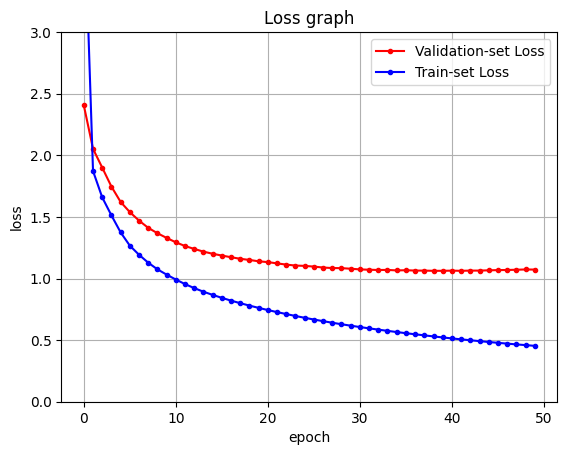

In [50]:
import matplotlib.pyplot as plt

# loss 값을 plot
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph') 
plt.ylim(0,3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

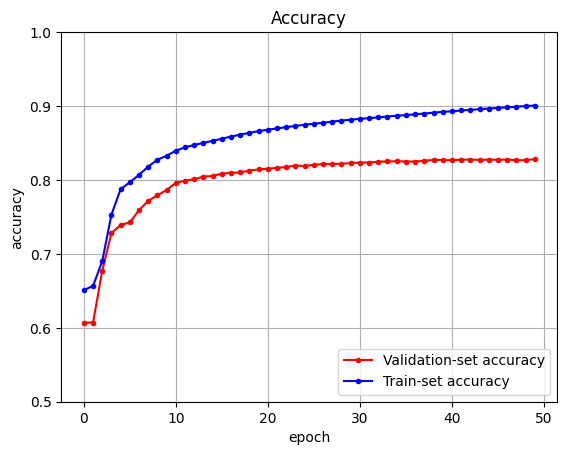

In [39]:
# accuracy 값을 plot
y_vacc = history.history['val_acc']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Step 6. 모델 평가하기

__인코더 정의. encoder_inputs와 encoder_states는 이미 정의한 것들을 재사용__

In [40]:
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 64)          291648    
                                                                 
 masking (Masking)           (None, None, 64)          0         
                                                                 
 lstm (LSTM)                 [(None, 32),              12416     
                              (None, 32),                        
                              (None, 32)]                        
                                                                 
Total params: 304,064
Trainable params: 304,064
Non-trainable params: 0
_________________________________________________________________


__테스트 단계용 디코더 설계__

In [41]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(32,))

# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(32,))

# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer

# decoder_states_inputs를 현재 time step의 초기 상태로 사용
# 구체적 동작은 def decode_sequence()에 구현
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, 
                                                 initial_state = decoder_states_inputs)

# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states2 = [state_h2, state_c2]

__디코더의 출력층을 재설계__

In [42]:
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs2] + decoder_states2)
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 64)     532352      ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 32)]         0           []                               
                                                                                            

__단어에서 정수로, 정수에서 단어로 바꾸는 사전(dictionary)을 준비__
* 테스트 결과 해석을 위해 필요

In [43]:
eng2idx = tokenizer.word_index
fra2idx = tokenizer_fra.word_index
idx2eng = tokenizer.index_word
idx2fra = tokenizer_fra.index_word

__예측 과정을 위한 함수 decode_sequence() 구현__
* decode_sequence()의 입력으로 들어가는 것은 번역하고자 하는 문장의 정수 시퀀스
* decode_sequence() 내부에는 인코더를 구현한 encoder_model이 있어서 이 모델에 번역하고자 하는 문장의 정수 시퀀스인 'input_seq'를 입력하면, encoder_model은 마지막 시점의 hidden state를 리턴
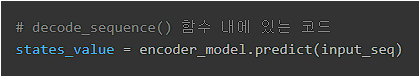

In [44]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer_fra.word_index['<sos>']

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이전 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '<eos>' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [45]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0):
            sentence = sentence + idx2eng[encoded_word] + ' '
    return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0 and encoded_word != fra2idx['<sos>'] and encoded_word != fra2idx['<eos>']):
            sentence = sentence + idx2fra[encoded_word] + ' '
    return sentence

훈련 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력해보자

In [46]:
for seq_index in [3, 50, 100, 300, 1001]:
    input_seq = encoder_input_train[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    
    print('입력문장 :', seq_to_src(encoder_input_train[seq_index]))
    print('정답문장 :', seq_to_tar(decoder_input_train[seq_index]))
    print('번역문장 :', decoded_sentence[1:-5])
    print('-'*50)

1/1 [==============================] - 0s 18ms/step
입력문장 : go . 
정답문장 : bouge ! 
번역문장 : nroute!
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : hello ! 
정답문장 : bonjour ! 
번역문장 : alut!
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : got it ! 
정답문장 : compris ! 
번역문장 : echien!
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
입력문장 : goodbye . 
정답문장 : au revoir . 
번역문장 : lamaison!
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
입력문장 : hands off . 
정답문장 : pas touche ! 
번역문장 : onne-moile!
--------------------------------------------------


테스트 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력해보자

In [47]:
for seq_index in [3, 50, 100, 300, 1001]:
    input_seq = encoder_input_test[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)

    print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
    print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
    print("번역문장 :",decoded_sentence[1:-5])
    print("-"*50)

1/1 [==============================] - 0s 17ms/step
입력문장 : whose pen is this ? 
정답문장 : à qui est ce stylo ? 
번역문장 : uiest-cequetomest?
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
입력문장 : why not just quit ? 
정답문장 : pourquoi ne pas simplement démissionner ? 
번역문장 : ùn'n'êtes-vousété?
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : you are fantastic . 
정답문장 : tu es formidable . 
번역문장 : uesfantastique.
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : you must stop him . 
정답문장 : vous devez l ' arrêter . 
번역문장 : lmefautquetuen
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : did anyone hear me ? 
정답문장 : quiconque m ' a - t - il entendu ? 
번역문장 : ersonneest-ceq
--------------------------------------------------


* 번역된 문장을 보면 딱 봐도 아닌것 같지만 혹시나 하는 맘에 번역 문장을 파파고로 돌려봤으나, 역시나 전혀 맞지 않음...
* 긴 문장은 고사하고 한 단어로 이뤄진 go, hello 같은 문장을 잘못 번역 하는게 이상함.
* 불어에 대한 이해 없이 영어랑 똑같은 전처리 방식을 이용한게 문제가 되지 않았나 싶음
* 훈련, 검증 데이터의 loss 값을 보면 훈련과 검증 모두 일정 epoch 이상에서 더이상 감소하거나 증가(과적합)되지 않고 정체됨
    * 모델의 표현력이 부족했기 때문이라고 생각됨.(층 갯수, 각 층의 unit갯수 부족)
    * 층을 추가하거나, 더 많은 가중치를 갖도록 층 크기를 늘리거나, 더 적합한 종류의 층을 사용함으로써 해결할 수 있음
    * 일단, embedding layer의 dim과 hidden layer의 unit을 64, 32에서 모두 128로 늘린 후 학습 및 검증 시도함

### 후처리
1. embedding layer의 dim과 hidden layer의 unit을 모두 128로 늘린 후 학습 및 검증결과
    * loss가 30 epoch에서 최적점을 찍고 이후에 살짝 상승함
    * 문제는, train set의 loss가 0에 수렴하면서 과적합이 심해짐.
    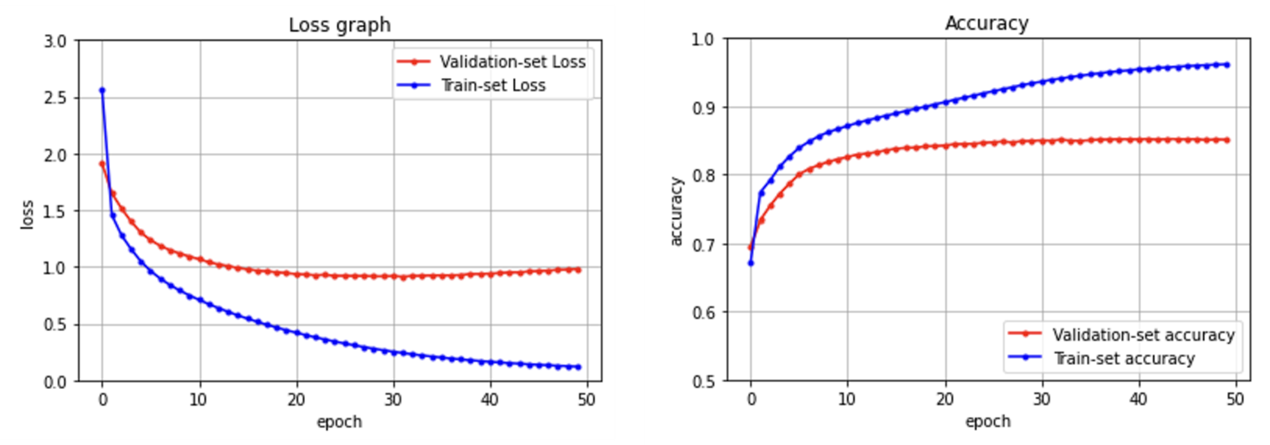
2. batch_size 128 -> 256으로 조절
    * 무의미함. 그리고 위 계산을 돌리고 batchsize만 바꿨더니 이미 패턴을 학습한 듯 함. 첨부터 다시 돌려서 평가해야겠다
    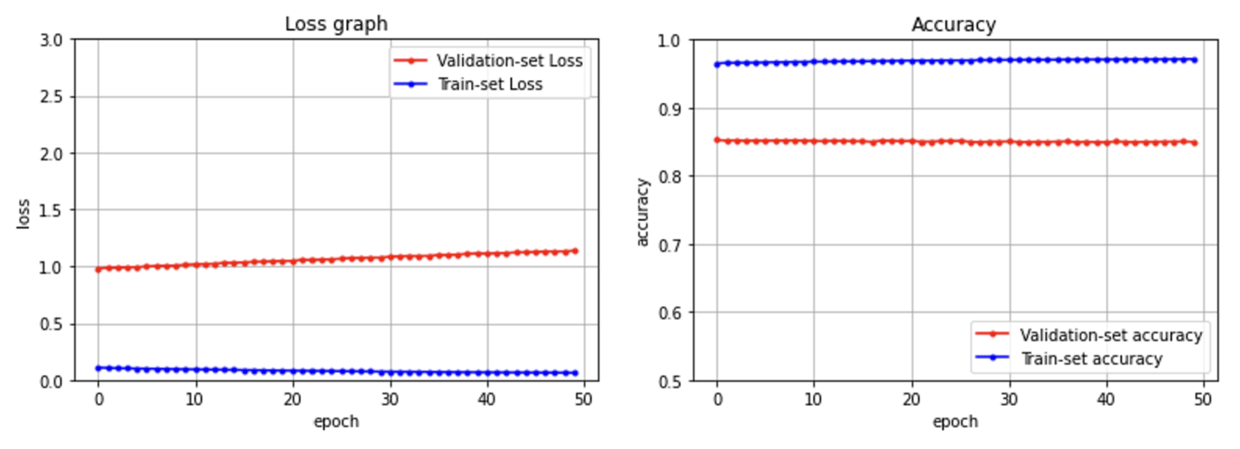
3. Adam learning rate default(0.001) -> 0.0005로 조절
    * 2 번과 같은 결과
4. encoder와 decoder 에 LSTM 층 하나씩 추가
    * 1번과 매우 유사함. activation function을 안넣어줘서 데이터 표현력이 나아지지 않은건가?
    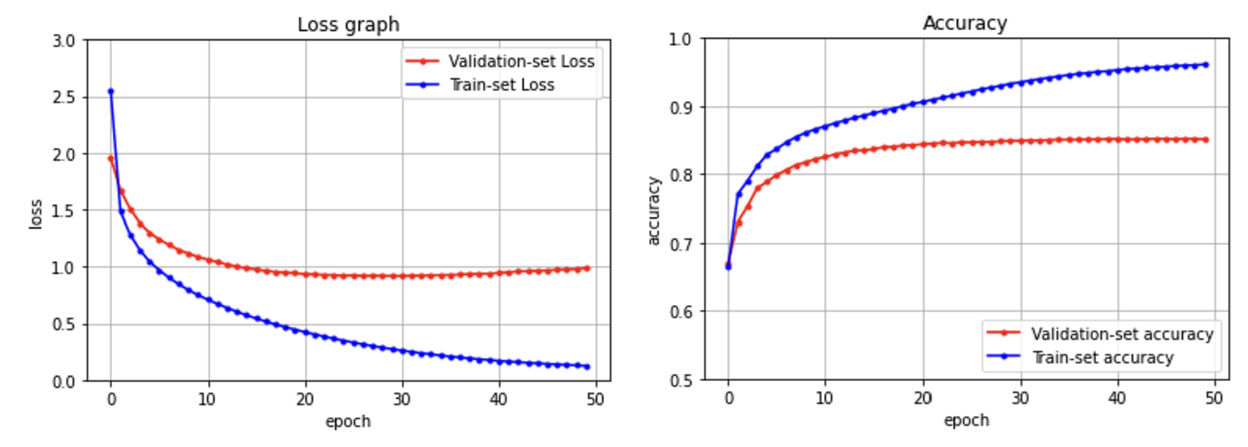
5. optimizer를 adam에서 rmsprop으로 바꿔보기
    * 지금껏 수행한 것 중, 그나마 loss가 다시 증가하는 경향을 보이고, 학습과 검증 데이터 간의 손실, 정확도 차이가 가장 작음
    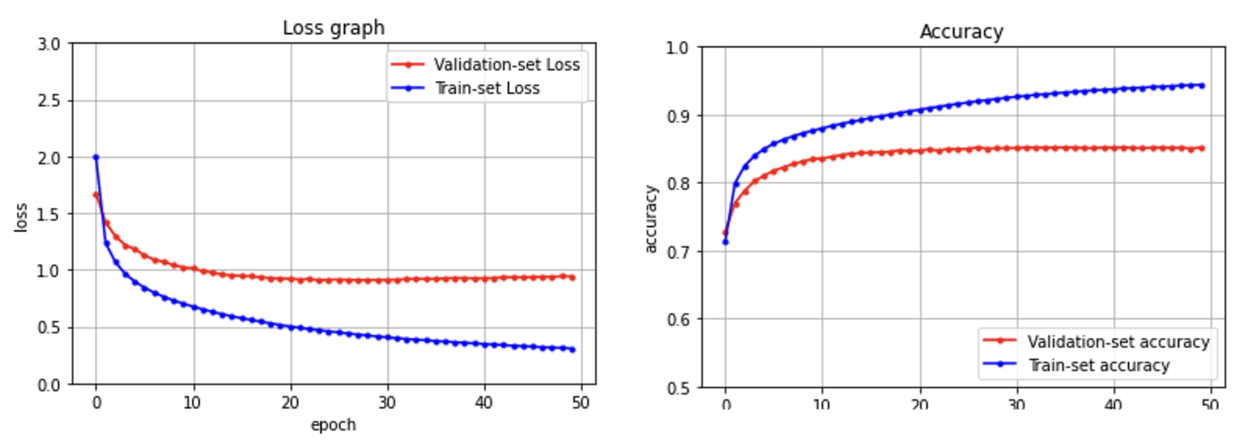
6. LSTM layer에 activation function 'tanh' 적용해보기(첫번째 층에만 적용해봄)
    * 이정도에서 만족하고... epoch30 지점이 최적인 것 같으니 30까지만 돌리고 뒤에 단계 진행
    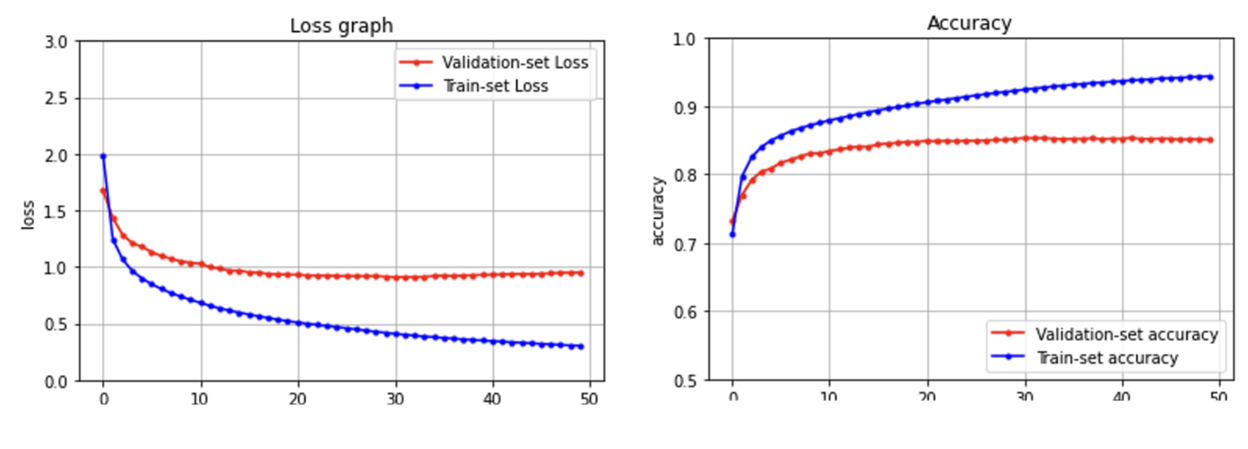
    
* 이후에 학습 데이터와 테스트 데이터를 사용해서 번역해봤지만, 여전히 하나도 안맞음

7. 전처리된 문장을 보면 영어는 어퍼스트로피(')를 기준으로 단어가 분리된 문장이 있고, 불어는 슬래시 '-'를 기준으로 분리된 문장이 있음. 해당 punctation 뒤에 오는 단어는 대체로 문자 한개로 이루어진 경우가 많아서 학습 자체가 제대로 되지 않은 것으로 보임. 은정님께서는 어퍼스트로피를 나누지 않고 토큰화를 진행하셔서 은정님 코드를 참고해서 전처리를 다시해봄. [전처리부터 다시한 파일](https://github.com/LubyJ/LubyJ/blob/master/%5BEP10%5D_%ED%9B%84%EC%B2%98%EB%A6%AC2.ipynb)
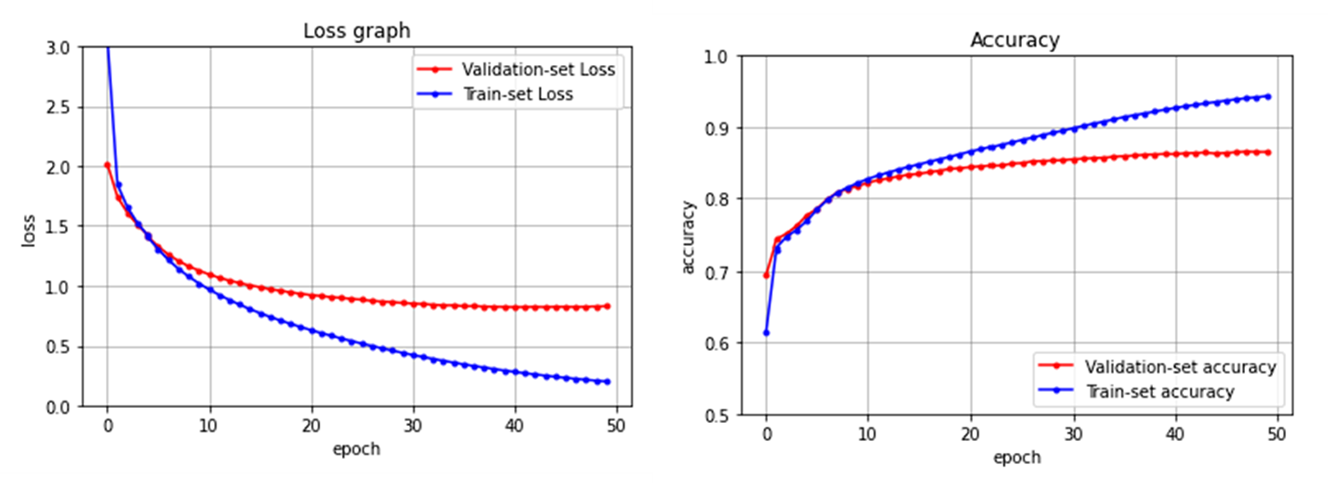

* 여전히 최적점 지점을 알 수가 없으나, 해당 모델 사용해서 번역 돌려본 결과 학습 데이터는 종종 옳게 번역함. 테스트 데이터는 전혀 맞지 않음. 또한, 띄어쓰기가 안된 상태로 출력됨.
* 학습 데이터 번역 결과
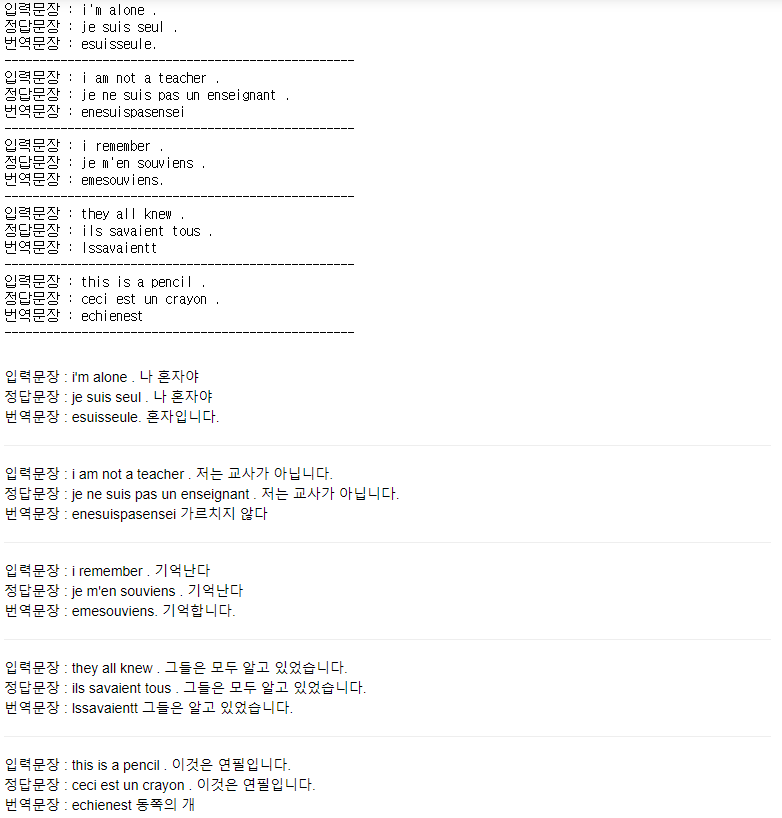

* 테스트 데이터 번역 결과
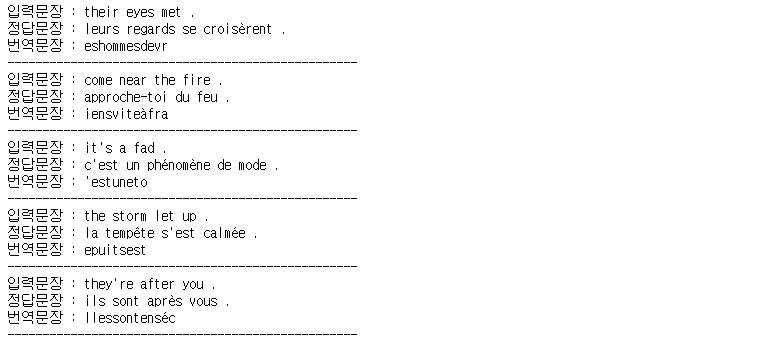

* val_loss가 다시 증가하지 않고 정체된 그래프는 처음 접해봐서 매우 당황스러웠다. 모델을 다양하게 바꿔봤지만, 오히려 val_loss가 1.0 이상으로 증가하거나 train loss가 급격히 감소하기만 할 뿐 개선되지 않았다. 그나마 전처리를 다시하고 모델 파라미터 몇 개를 바꾼 후에 학습 데이터의 번역 성능이 조금 개선되었으나, 테스트 데이터의 번역 성능은 매우 안좋다. 개선 방안을 더 알아봐야겠다.